In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 시각화 과정에서 한글 깨짐 방지!!!!

from matplotlib import font_manager, rc
import matplotlib
import platform
import matplotlib.pyplot as plt

%matplotlib inline 

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font',family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [3]:
df = pd.read_excel('CJ제일제당 주문 데이터(전처리).xlsx')

In [4]:
df['시간대'] = df['주문접수일시'].dt.hour
df['시간대 대분류'] = '21 ~ 00'
df.loc[(df['시간대'] >= 0) & (df['시간대'] < 3),'시간대 대분류'] = '00 ~ 03'
df.loc[(df['시간대'] >= 3) & (df['시간대'] < 6),'시간대 대분류'] = '03 ~ 06'
df.loc[(df['시간대'] >= 6) & (df['시간대'] < 9),'시간대 대분류'] = '06 ~ 09'
df.loc[(df['시간대'] >= 9) & (df['시간대'] < 12),'시간대 대분류'] = '09 ~ 12'
df.loc[(df['시간대'] >= 12) & (df['시간대'] < 15),'시간대 대분류'] = '12 ~ 15'
df.loc[(df['시간대'] >= 15) & (df['시간대'] < 18),'시간대 대분류'] = '15 ~ 18'
df.loc[(df['시간대'] >= 18) & (df['시간대'] < 21),'시간대 대분류'] = '18 ~ 21'

In [5]:
df['유입채널 대분류'] = '기타 및 이벤트 광고'
df.loc[((df['유입채널'] == '유실 채널상세') | (df['유입채널'] == '디폴트 채널상세')), '유입채널 대분류'] = 'CJ 앱/사이트'
df.loc[df['유입채널'].str.contains('가격비교'), '유입채널 대분류'] = '가격비교'
df.loc[df['유입채널'].str.contains('모바일'), '유입채널 대분류'] = '모바일 공유'
df.loc[df['유입채널'].str.contains('검색'), '유입채널 대분류'] = '검색'

In [6]:
df.columns
df = df[['주문접수일시', '주문번호', '유입채널 대분류', '시간대 대분류', '주문월', '아이디', '판매자상품명', '판매가', '표준카테고리']]

In [7]:
df.head()

,주문접수일시,주문번호,유입채널 대분류,시간대 대분류,주문월,아이디,판매자상품명,판매가,표준카테고리
0,2022-01-01 00:38:13,2022010111866837,가격비교,00 ~ 03,1,kim6****,CJ 다담 된장찌개양념 530G x3,16240,가공식품 > 장류 > 된장/쌈장/청국장
1,2022-01-01 02:54:53,2022010111873735,CJ 앱/사이트,00 ~ 03,1,savi****,비비고 국물요리 BEST 9종,33240,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
2,2022-01-01 02:56:35,2022010111873774,CJ 앱/사이트,00 ~ 03,1,savi****,비비고 국물요리 BEST 9종,33240,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥
3,2022-01-01 04:35:17,2022010111875631,가격비교,03 ~ 06,1,happ****,CJ 다담 된장찌개양념 530G X 4개,21660,가공식품 > 장류 > 된장/쌈장/청국장
4,2022-01-01 08:00:37,2022010111879668,CJ 앱/사이트,06 ~ 09,1,cats****,비비고 남도식 추어탕 460Gx5개,23680,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕


In [8]:
df_1 = df[df['주문월'] == 1]
df_2 = df[df['주문월'] == 2]
df_3 = df[df['주문월'] == 3]
df_4 = df[df['주문월'] == 4]
df_5 = df[df['주문월'] == 5]
df_6 = df[df['주문월'] == 6]
df_7 = df[df['주문월'] == 7]
df_8 = df[df['주문월'] == 8]
df_9 = df[df['주문월'] == 9]

<AxesSubplot:xlabel='count', ylabel='판매자상품명'>

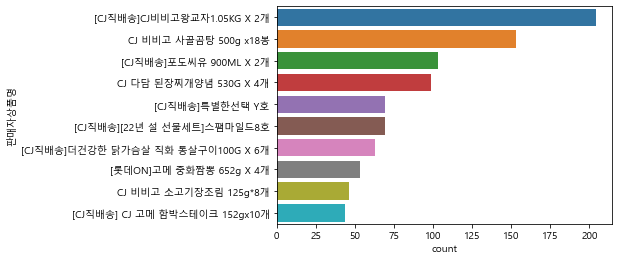

In [9]:
df_1['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_1, order=[df_1['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

<AxesSubplot:xlabel='count', ylabel='표준카테고리'>

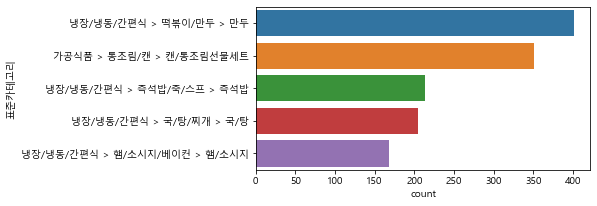

In [10]:
plt.figure(figsize=(6,3))
sns.countplot(y='표준카테고리', data=df_1, order=[df_1['표준카테고리'].value_counts().head(5).index[i] for i in range(0,5)])

## -> 1월 : 만두 > 선물세트 > 즉석밥 > 국/탕 > 스테이크, 햄 등등 (선물세트..?)

<AxesSubplot:xlabel='count', ylabel='판매자상품명'>

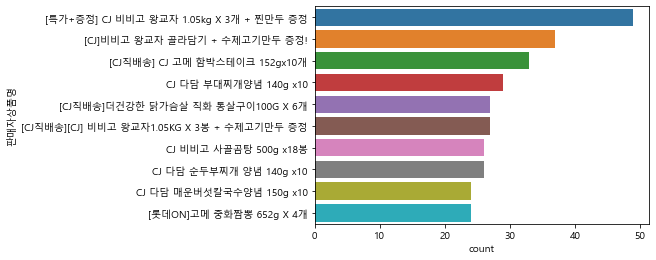

In [11]:
df_2['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_2, order=[df_2['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

<AxesSubplot:xlabel='count', ylabel='표준카테고리'>

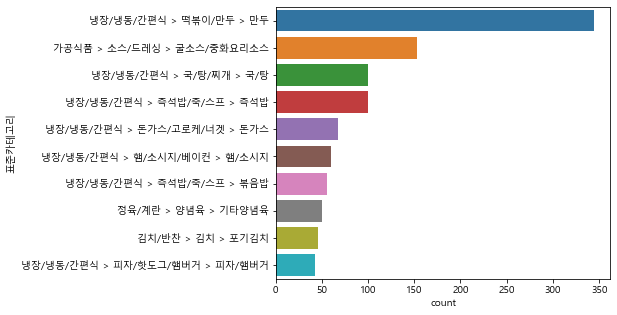

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_2, order=[df_2['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

## -> 2월 : 만두 > 요리소스 > 즉석밥 > 국/탕 > 스테이크, 햄 등등  (요리소스...?)

<AxesSubplot:xlabel='count', ylabel='판매자상품명'>

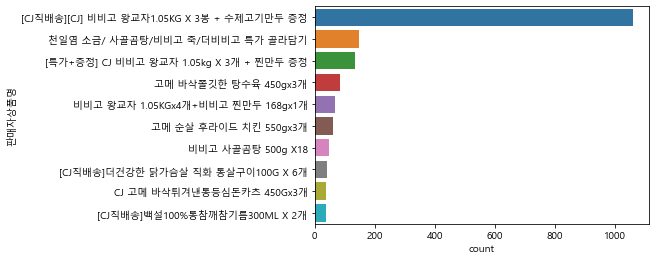

In [13]:
df_3['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_3, order=[df_3['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

<AxesSubplot:xlabel='count', ylabel='표준카테고리'>

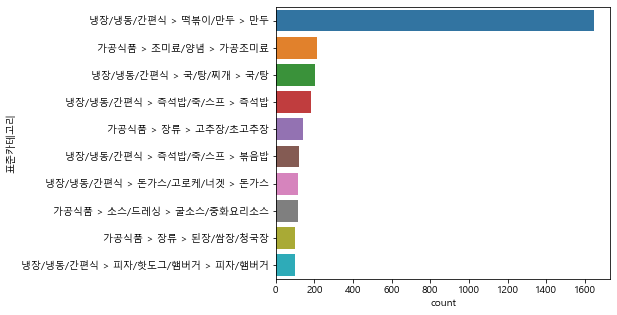

In [14]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_3, order=[df_3['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

## 3월은 만두 > 조미료 > 국/탕 > 즉석밥/죽 > 돈가스

<AxesSubplot:xlabel='count', ylabel='판매자상품명'>

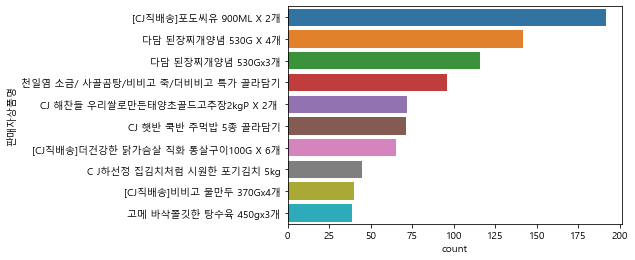

In [15]:
df_4['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_4, order=[df_4['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

<AxesSubplot:xlabel='count', ylabel='표준카테고리'>

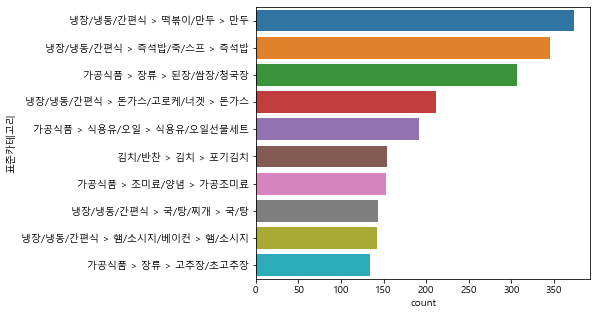

In [16]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_4, order=[df_4['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

## 4월 - 만두 > 즉석밥 > 장류 > 돈가스 > 식용유 (장류...??)

<AxesSubplot:xlabel='count', ylabel='판매자상품명'>

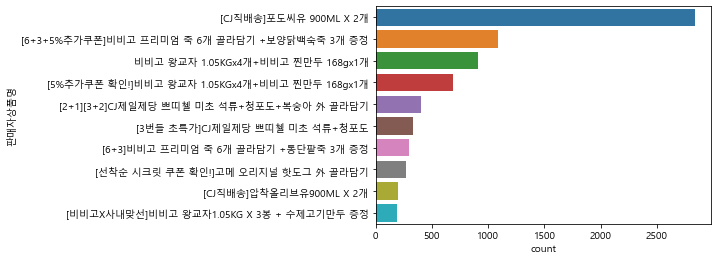

In [17]:
df_5['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_5, order=[df_5['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

<AxesSubplot:xlabel='count', ylabel='표준카테고리'>

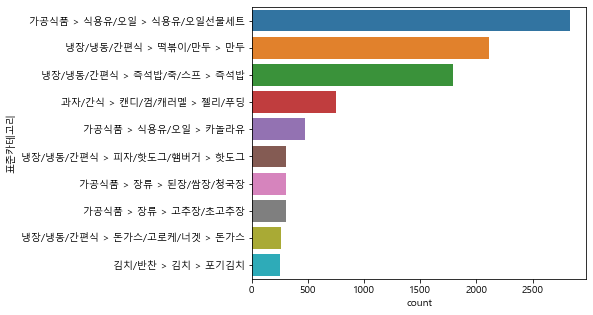

In [18]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_5, order=[df_5['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

### 5월: 식용유 > 만두 > 즉석밥 > 젤리/푸딩 (식용유나 젤리/푸딩 행사한 것 같군요.)

<AxesSubplot:xlabel='count', ylabel='판매자상품명'>

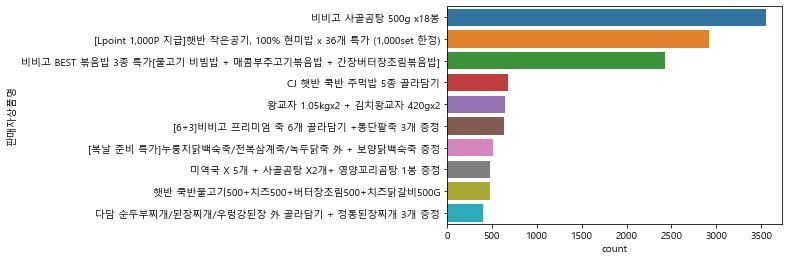

In [19]:
df_6['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_6, order=[df_6['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

<AxesSubplot:xlabel='count', ylabel='표준카테고리'>

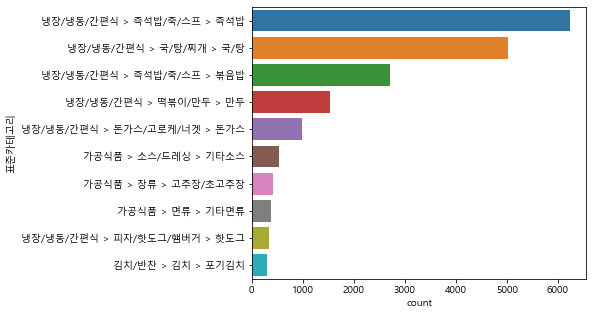

In [20]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_6, order=[df_6['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

## 6월 : 즉석밥 > 국/탕 > 볶음밥 > 만두 > 돈가스 (밥 종류에서 행사한 것 같군요...)

<AxesSubplot:xlabel='count', ylabel='판매자상품명'>

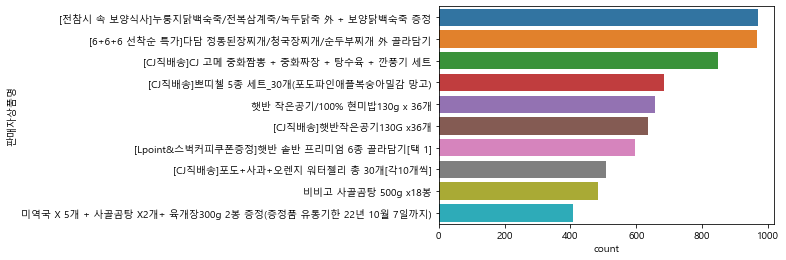

In [21]:
df_7['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_7, order=[df_7['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

<AxesSubplot:xlabel='count', ylabel='표준카테고리'>

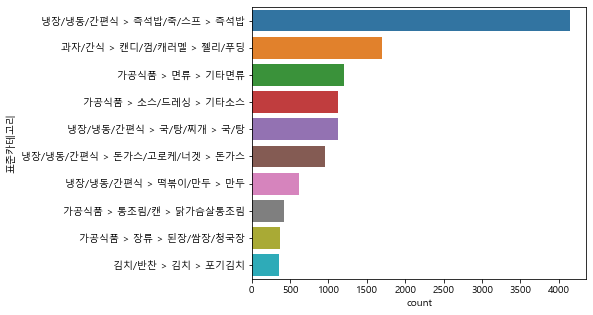

In [22]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_7, order=[df_7['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

## 7월: 즉석밥 > 푸딩 > 면 > 소스 > 국/탕 (즉석밥 행사 여전, 푸딩 행사 시작)

<AxesSubplot:xlabel='count', ylabel='판매자상품명'>

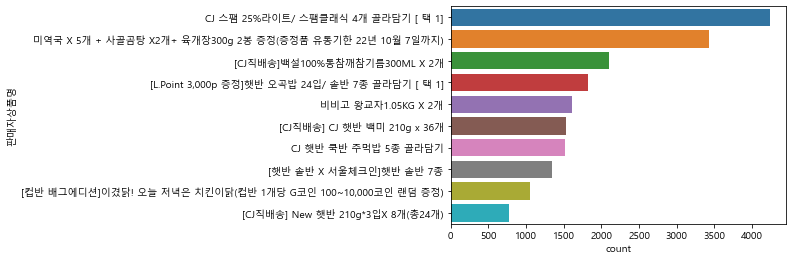

In [23]:
df_8['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_8, order=[df_8['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

<AxesSubplot:xlabel='count', ylabel='표준카테고리'>

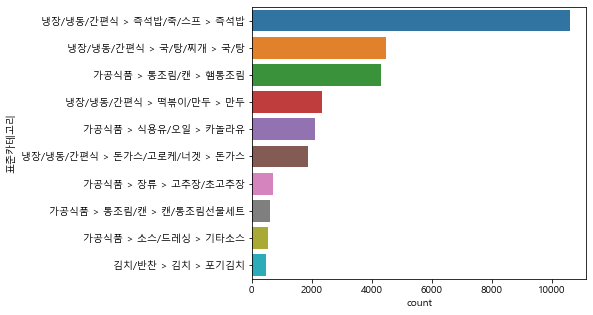

In [24]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_8, order=[df_8['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

## 8월 : 즉석밥 > 국/탕 > 햄통조림 > 만두 > 식용유 (즉석밥 여러 행사 진행중, 국/탕 및 통조림 행사가 매출에 큰 영향을 미침)

<AxesSubplot:xlabel='count', ylabel='판매자상품명'>

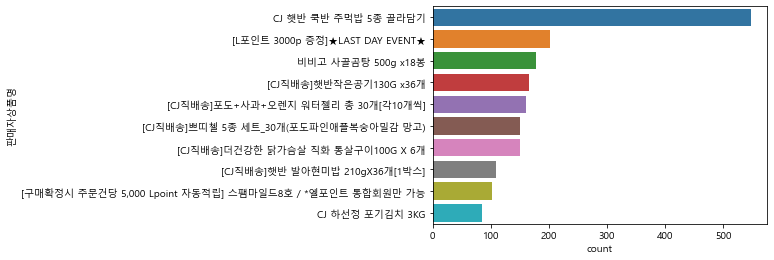

In [25]:
df_9['판매자상품명'].value_counts().head(10)
sns.countplot(y='판매자상품명', data=df_9, order=[df_9['판매자상품명'].value_counts().head(10).index[i] for i in range(0,10)])

<AxesSubplot:xlabel='count', ylabel='표준카테고리'>

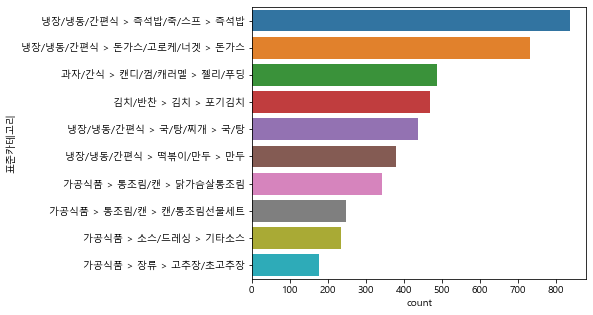

In [26]:
plt.figure(figsize=(6,5))
sns.countplot(y='표준카테고리', data=df_9, order=[df_9['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)])

## 9월 : 즉석밥 > 돈가스 > 젤리 > 김치 > 국/탕 (돈가스랑, 젤리)

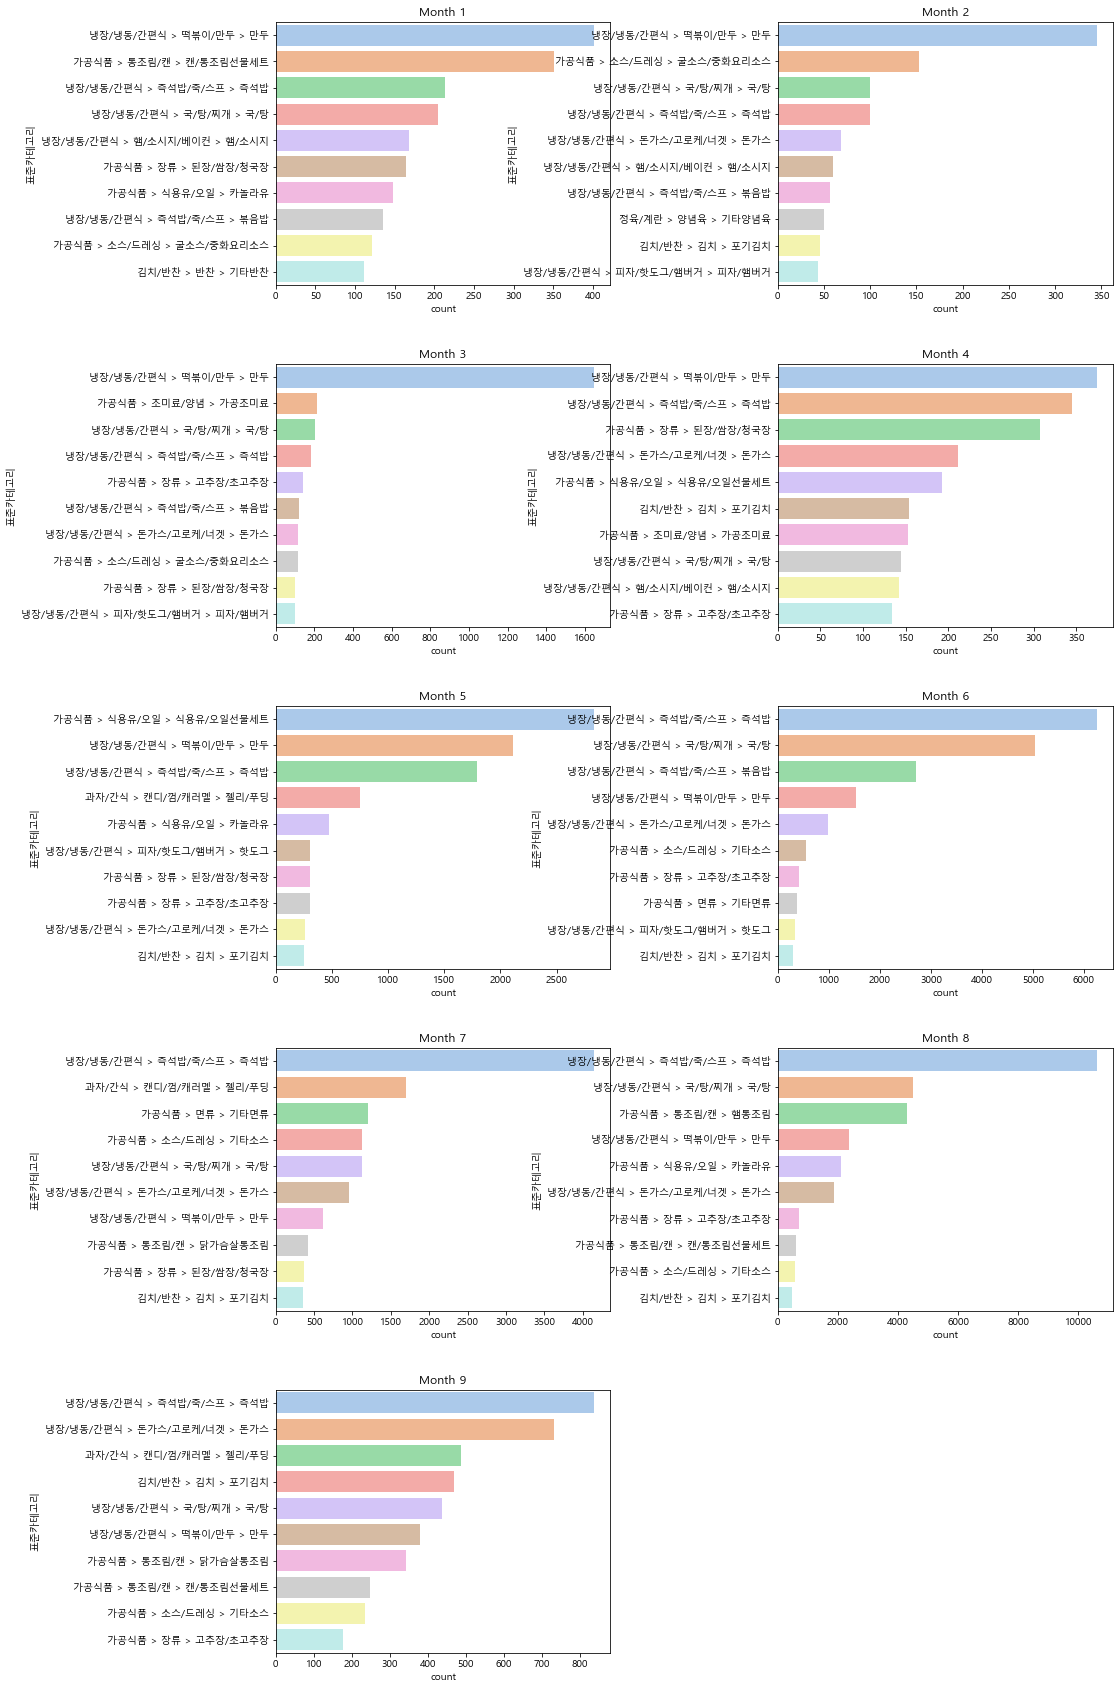

In [27]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(5,2) # 그래프를 9개를 그려보겠습니다.

plt.figure(figsize=(15,30))  
plt.subplots_adjust(wspace=0.5, hspace=0.3) 

months = [i for i in range(1, 10)]

for idx, month in enumerate(months):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(y='표준카테고리',
                data=df[df['주문월'] == month],
                order=[df[df['주문월'] == month]['표준카테고리'].value_counts().head(10).index[i] for i in range(0,10)],
                palette='pastel',
                ax=ax
                )
    ax.set_title(f'Month {month}')

## 월별로 수요가 많은 상품에 대해 비회원 및 주문 횟수가 2회 이하인 회원에게 할인 이벤트 진행 시 광고를 효과적으로 하면 좋을 것 같습니다.

In [28]:
df.groupby(['주문월', '표준카테고리'])['주문접수일시'].count()

주문월  표준카테고리                    
1    가공식품 > 면류 > 국수                 1
     가공식품 > 면류 > 기타면류              33
     가공식품 > 면류 > 당면                 7
     가공식품 > 면류 > 우동                 1
     가공식품 > 면류 > 중화면               21
                                   ..
9    수산/건어물 > 수산선물세트 > 김/미역선물세트     3
     정육/계란 > 양념육 > 기타양념육           10
     정육/계란 > 양념육 > 돼지양념육            8
     커피/생수/음료 > 주스/과즙음료 > 과일음료     12
     커피/생수/음료 > 차류 > 과일청            3
Name: 주문접수일시, Length: 473, dtype: int64

In [29]:
df_tops = pd.DataFrame(data = [[0] * 9 for i in range(65)], 
                       columns=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월'], 
                       index=df['표준카테고리'].value_counts().sort_index().index )
df_tops['1월'] = df_1['표준카테고리'].value_counts().sort_values()
df_tops['2월'] = df_2['표준카테고리'].value_counts().sort_values()
df_tops['3월'] = df_3['표준카테고리'].value_counts().sort_values()
df_tops['4월'] = df_4['표준카테고리'].value_counts().sort_values()
df_tops['5월'] = df_5['표준카테고리'].value_counts().sort_values()
df_tops['6월'] = df_6['표준카테고리'].value_counts().sort_values()
df_tops['7월'] = df_7['표준카테고리'].value_counts().sort_values()
df_tops['8월'] = df_8['표준카테고리'].value_counts().sort_values()
df_tops['9월'] = df_9['표준카테고리'].value_counts().sort_values()

df_tops = df_tops.fillna(0)

In [32]:
df_tops

,1월,2월,3월,4월,5월,6월,7월,8월,9월
가공식품 > 면류 > 국수,1.0,2.0,2.0,2.0,0.0,4.0,3.0,2.0,1.0
가공식품 > 면류 > 기타면류,33.0,37.0,54.0,112.0,126.0,375.0,1200.0,222.0,66.0
가공식품 > 면류 > 당면,7.0,2.0,3.0,5.0,5.0,5.0,1.0,8.0,10.0
가공식품 > 면류 > 스파게티/파스타,0.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0
가공식품 > 면류 > 우동,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
수산/건어물 > 수산선물세트 > 김/미역선물세트,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
정육/계란 > 양념육 > 기타양념육,46.0,50.0,55.0,24.0,17.0,45.0,83.0,27.0,10.0
정육/계란 > 양념육 > 돼지양념육,1.0,2.0,4.0,1.0,0.0,8.0,10.0,6.0,8.0
커피/생수/음료 > 주스/과즙음료 > 과일음료,0.0,1.0,2.0,4.0,9.0,273.0,11.0,15.0,12.0


In [33]:
df_topT = df_tops.transpose()

In [34]:
df_topT

,가공식품 > 면류 > 국수,가공식품 > 면류 > 기타면류,가공식품 > 면류 > 당면,가공식품 > 면류 > 스파게티/파스타,가공식품 > 면류 > 우동,가공식품 > 면류 > 중화면,가공식품 > 밀가루/믹스류 > 미숫가루,가공식품 > 밀가루/믹스류 > 밀가루,가공식품 > 밀가루/믹스류 > 베이킹믹스,가공식품 > 밀가루/믹스류 > 튀김/부침가루,...,냉장/냉동/간편식 > 피자/핫도그/햄버거 > 핫도그,냉장/냉동/간편식 > 햄/소시지/베이컨 > 베이컨/슬라이스햄,냉장/냉동/간편식 > 햄/소시지/베이컨 > 햄/소시지,수산/건어물 > 김/해조류 > 조미김/도시락김,수산/건어물 > 생선 > 반조리생선,수산/건어물 > 수산선물세트 > 김/미역선물세트,정육/계란 > 양념육 > 기타양념육,정육/계란 > 양념육 > 돼지양념육,커피/생수/음료 > 주스/과즙음료 > 과일음료,커피/생수/음료 > 차류 > 과일청
1월,1.0,33.0,7.0,0.0,1.0,21.0,0.0,0.0,7.0,0.0,...,8.0,5.0,168.0,68.0,71.0,0.0,46.0,1.0,0.0,1.0
2월,2.0,37.0,2.0,0.0,0.0,16.0,0.0,0.0,2.0,1.0,...,26.0,4.0,60.0,20.0,24.0,0.0,50.0,2.0,1.0,0.0
3월,2.0,54.0,3.0,2.0,1.0,21.0,0.0,0.0,4.0,0.0,...,37.0,4.0,78.0,48.0,18.0,0.0,55.0,4.0,2.0,0.0
4월,2.0,112.0,5.0,1.0,0.0,10.0,0.0,0.0,14.0,3.0,...,31.0,1.0,142.0,21.0,11.0,0.0,24.0,1.0,4.0,4.0
5월,0.0,126.0,5.0,2.0,0.0,28.0,0.0,5.0,24.0,4.0,...,310.0,4.0,161.0,27.0,17.0,0.0,17.0,0.0,9.0,2.0
6월,4.0,375.0,5.0,0.0,0.0,14.0,0.0,7.0,18.0,1.0,...,333.0,1.0,192.0,31.0,1.0,0.0,45.0,8.0,273.0,4.0
7월,3.0,1200.0,1.0,0.0,0.0,26.0,159.0,4.0,24.0,0.0,...,43.0,1.0,85.0,109.0,0.0,0.0,83.0,10.0,11.0,2.0
8월,2.0,222.0,8.0,0.0,0.0,28.0,34.0,1.0,13.0,0.0,...,43.0,3.0,99.0,76.0,0.0,0.0,27.0,6.0,15.0,3.0
9월,1.0,66.0,10.0,0.0,0.0,29.0,13.0,1.0,19.0,0.0,...,31.0,3.0,45.0,27.0,0.0,3.0,10.0,8.0,12.0,3.0


In [37]:
df_topT.corr().head()

,가공식품 > 면류 > 국수,가공식품 > 면류 > 기타면류,가공식품 > 면류 > 당면,가공식품 > 면류 > 스파게티/파스타,가공식품 > 면류 > 우동,가공식품 > 면류 > 중화면,가공식품 > 밀가루/믹스류 > 미숫가루,가공식품 > 밀가루/믹스류 > 밀가루,가공식품 > 밀가루/믹스류 > 베이킹믹스,가공식품 > 밀가루/믹스류 > 튀김/부침가루,...,냉장/냉동/간편식 > 피자/핫도그/햄버거 > 핫도그,냉장/냉동/간편식 > 햄/소시지/베이컨 > 베이컨/슬라이스햄,냉장/냉동/간편식 > 햄/소시지/베이컨 > 햄/소시지,수산/건어물 > 김/해조류 > 조미김/도시락김,수산/건어물 > 생선 > 반조리생선,수산/건어물 > 수산선물세트 > 김/미역선물세트,정육/계란 > 양념육 > 기타양념육,정육/계란 > 양념육 > 돼지양념육,커피/생수/음료 > 주스/과즙음료 > 과일음료,커피/생수/음료 > 차류 > 과일청
가공식품 > 면류 > 국수,1.000000,0.529143,-0.403473,-0.418461,-0.188982,-0.474875,0.345922,3.644657e-01,-0.001456,-0.357143,...,0.121522,-0.705024,0.098911,0.241620,-0.412223,-0.285714,0.581406,0.624690,0.678856,0.286658
가공식품 > 면류 > 기타면류,0.529143,1.000000,-0.486172,-0.289711,-0.308963,0.190765,0.947822,4.920073e-01,0.568422,-0.216899,...,0.053898,-0.618833,-0.047948,0.725835,-0.400502,-0.181790,0.681002,0.673307,0.152624,0.174039
가공식품 > 면류 > 당면,-0.403473,-0.486172,1.000000,-0.223301,-0.021786,0.348363,-0.406498,-1.633913e-01,0.127470,-0.115278,...,-0.040286,0.200059,0.055651,-0.197158,0.034747,0.634029,-0.781514,0.018283,0.008590,0.447006
가공식품 > 면류 > 스파게티/파스타,-0.418461,-0.289711,-0.223301,1.000000,0.285714,0.015991,-0.310092,-1.189525e-17,0.009630,0.566947,...,0.271402,0.235727,0.129046,-0.304802,0.013199,-0.236228,-0.190192,-0.509534,-0.248157,-0.235727
가공식품 > 면류 > 우동,-0.188982,-0.308963,-0.021786,0.285714,1.000000,-0.036550,-0.248073,-4.285714e-01,-0.581648,-0.377964,...,-0.323231,0.594442,0.092433,0.194337,0.718294,-0.188982,0.271703,-0.299726,-0.225308,-0.594442


In [52]:
df_topT.corr()['냉장/냉동/간편식 > 떡볶이/만두 > 만두'].sort_values(ascending=False)[1:6]

가공식품 > 조미료/양념 > 가공/구운소금       0.806825
가공식품 > 장류 > 고추장/초고추장          0.777747
가공식품 > 식용유/오일 > 카놀라유          0.672990
냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥    0.634193
가공식품 > 조미료/양념 > 식초            0.577602
Name: 냉장/냉동/간편식 > 떡볶이/만두 > 만두, dtype: float64

In [49]:
df_topT.corr()['냉장/냉동/간편식 > 떡볶이/만두 > 만두'].sort_values(ascending=False).index[1:6]

Index(['가공식품 > 조미료/양념 > 가공/구운소금', '가공식품 > 장류 > 고추장/초고추장',
       '가공식품 > 식용유/오일 > 카놀라유'],
      dtype='object')

<AxesSubplot:xlabel='냉장/냉동/간편식 > 떡볶이/만두 > 만두'>

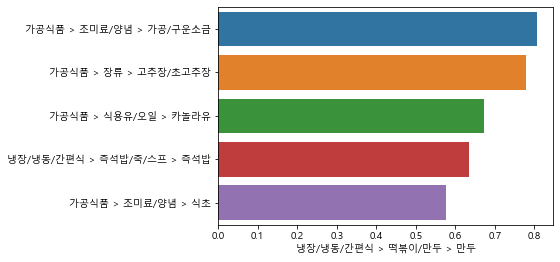

In [54]:
sns.barplot(y=df_topT.corr()['냉장/냉동/간편식 > 떡볶이/만두 > 만두'].sort_values(ascending=False).index[1:6],
            x=df_topT.corr()['냉장/냉동/간편식 > 떡볶이/만두 > 만두'].sort_values(ascending=False)[1:6])

In [55]:
df_topT.corr()['가공식품 > 소스/드레싱 > 굴소스/중화요리소스'].sort_values(ascending=False)

가공식품 > 소스/드레싱 > 굴소스/중화요리소스       1.000000
김치/반찬 > 김치 > 총각김치                0.702929
냉장/냉동/간편식 > 국/탕/찌개 > 찌개          0.629805
가공식품 > 통조림/캔 > 닭가슴살통조림           0.516570
정육/계란 > 양념육 > 돼지양념육              0.490461
                                   ...   
가공식품 > 면류 > 스파게티/파스타            -0.639510
과자/간식 > 디저트/케이크 > 푸딩            -0.643951
냉장/냉동/간편식 > 햄/소시지/베이컨 > 햄/소시지   -0.693776
가공식품 > 밀가루/믹스류 > 튀김/부침가루        -0.719601
과자/간식 > 기타간식 > 김스낵              -0.868193
Name: 가공식품 > 소스/드레싱 > 굴소스/중화요리소스, Length: 65, dtype: float64

<AxesSubplot:xlabel='가공식품 > 소스/드레싱 > 굴소스/중화요리소스'>

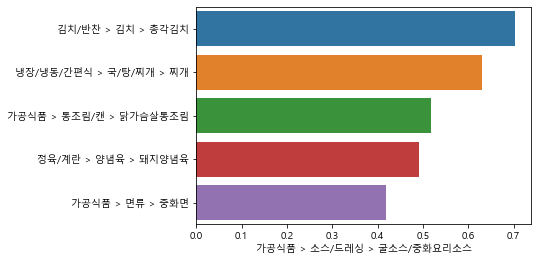

In [56]:
sns.barplot(y=df_topT.corr()['가공식품 > 소스/드레싱 > 굴소스/중화요리소스'].sort_values(ascending=False).index[1:6],
            x=df_topT.corr()['가공식품 > 소스/드레싱 > 굴소스/중화요리소스'].sort_values(ascending=False)[1:6])

In [57]:
df_topT.corr()['가공식품 > 식용유/오일 > 식용유/오일선물세트'].sort_values(ascending=False)

가공식품 > 식용유/오일 > 식용유/오일선물세트      1.000000
가공식품 > 밀가루/믹스류 > 튀김/부침가루        0.777364
가공식품 > 조미료/양념 > 갈색설탕            0.649141
냉장/냉동/간편식 > 피자/핫도그/햄버거 > 핫도그    0.627739
가공식품 > 면류 > 스파게티/파스타            0.614207
                                  ...   
냉장/냉동/간편식 > 즉석밥/죽/스프 > 컵밥      -0.395588
김치/반찬 > 김치 > 총각김치              -0.409879
정육/계란 > 양념육 > 돼지양념육            -0.447109
가공식품 > 소스/드레싱 > 굴소스/중화요리소스     -0.451132
가공식품 > 면류 > 국수                 -0.585149
Name: 가공식품 > 식용유/오일 > 식용유/오일선물세트, Length: 65, dtype: float64

<AxesSubplot:xlabel='가공식품 > 식용유/오일 > 식용유/오일선물세트'>

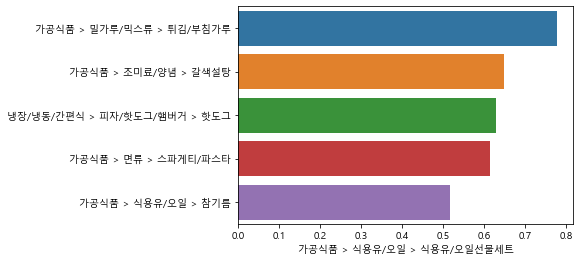

In [58]:
sns.barplot(y=df_topT.corr()['가공식품 > 식용유/오일 > 식용유/오일선물세트'].sort_values(ascending=False).index[1:6],
            x=df_topT.corr()['가공식품 > 식용유/오일 > 식용유/오일선물세트'].sort_values(ascending=False)[1:6])

In [199]:
df_topT.corr()['가공식품 > 장류 > 고추장/초고추장'].sort_values(ascending=False)

가공식품 > 장류 > 고추장/초고추장                1.000000
냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥          0.959144
냉장/냉동/간편식 > 돈가스/고로케/너겟 > 돈가스        0.903060
가공식품 > 식용유/오일 > 카놀라유                0.844303
냉장/냉동/간편식 > 국/탕/찌개 > 국/탕            0.843184
                                      ...   
과자/간식 > 기타간식 > 김스낵                 -0.359094
가공식품 > 면류 > 우동                     -0.373554
가공식품 > 식용유/오일 > 올리브유               -0.373554
수산/건어물 > 생선 > 반조리생선                -0.503663
냉장/냉동/간편식 > 밀키트/쿠킹박스 > 중식/일식/아시아   -0.515084
Name: 가공식품 > 장류 > 고추장/초고추장, Length: 65, dtype: float64

<AxesSubplot:xlabel='가공식품 > 장류 > 고추장/초고추장'>

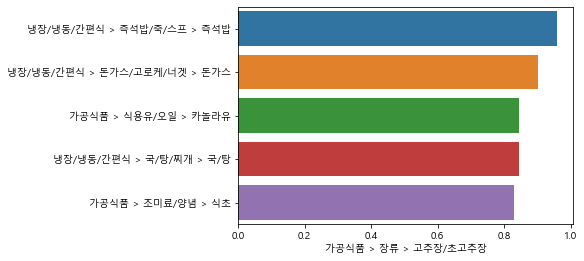

In [59]:
sns.barplot(y=df_topT.corr()['가공식품 > 장류 > 고추장/초고추장'].sort_values(ascending=False).index[1:6],
            x=df_topT.corr()['가공식품 > 장류 > 고추장/초고추장'].sort_values(ascending=False)[1:6])

In [1]:
sns.barplot(y=df_topT.corr()['가공식품 > 식용유/오일 > 식용유/오일선물세트'].sort_values(ascending=False).index[1:6],
            x=df_topT.corr()['가공식품 > 식용유/오일 > 식용유/오일선물세트'].sort_values(ascending=False)[1:6])

NameError: name 'sns' is not defined

# 각 상품별로 분석!!

## 1. 만두, 즉석밥, 국/탕, 돈가스 - 매월 상위권 차트에 있으며, 계절에 상관없이 많이 사는 것으로 파악된다. 계절 상관없이, 이벤트를 진행한다면, 매출이 떡상할 가능성이 보인다.

## 2. 중화요리소스 - 유독 2월에만 상위권이며, 2월에는 전체적인 주문량이 너무 적은 점을 보완하여, 상관관계가 높은 김치/찌개와 함께 이벤트를 진행하면 좋을 것 같다.

## 3. 캔/통조림 선물세트 - 주로 설/추석 기간에 선물세트로 주문 상위권에 올라오는 것 같으며, 명절 기간에 홍보, 할인 이벤트를 집중적으로 하면 좋을 것 같다.

## 4. 젤리/푸딩 - 유독 여름에만 매출이 많은 상품으로, 여름에 홍보 효과를 강화하면 좋을 것 같다.

## 5. 식용유 및 고추장 - 각자 상관관계가 높은 상품과 함께 이벤트 진행하면 좋을 것 같다.